# K최근접 알고리즘

In [1]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

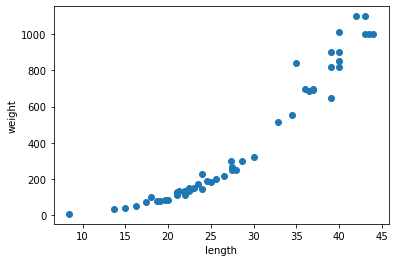

In [2]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [6]:
# 사이킷런에 사용할 훈련세트는 2차원 배열이여야 한다 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


- 결정계수 R

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

- 평균제곱오차

In [11]:
from sklearn.metrics import mean_absolute_error     
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 과대적합 과소적합

In [13]:
print(knr.score(train_input, train_target))

knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))


0.9804899950518966
0.9804899950518966
0.9746459963987609


- 확인문제

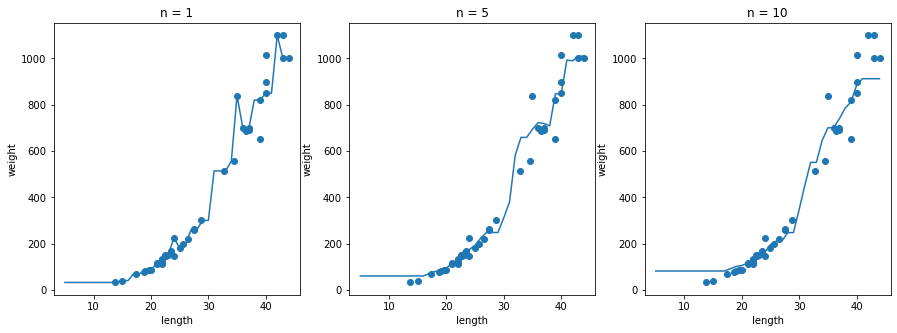

In [23]:
kn = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)       # 모델 데이터로 사용하기 위해 2차원 형태로 가공

figure = plt.figure(figsize=(15,5))
for idx,i in enumerate([1,5,10]):
    kn = KNeighborsRegressor(n_neighbors= i)
    kn.fit(train_input, train_target)
    predict = kn.predict(x)
    figure.add_subplot(1,3,idx+1)
    plt.scatter(train_input, train_target)
    plt.plot(x, predict)
    plt.title("n = {}".format(i))
    plt.xlabel("length")
    plt.ylabel("weight")
plt.show()
